## Laboratorio 2 - Deep Learning
Stefano Aragoni, Carol Arevalo

---------------

#### Importar librerías



In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from keras.layers import Activation

---------------

#### Importar Datos y Limpieza de Datos

In [125]:
#Load data into DatraFrame
df = pd.read_csv('movie_statistic_dataset.csv')

df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [126]:
# Eliminar columnas innecesarias
df.drop(["director_professions", "director_birthYear", "director_deathYear", "movie_title", "genres", "director_name", "production_date"], axis=1, inplace=True)

<AxesSubplot: >

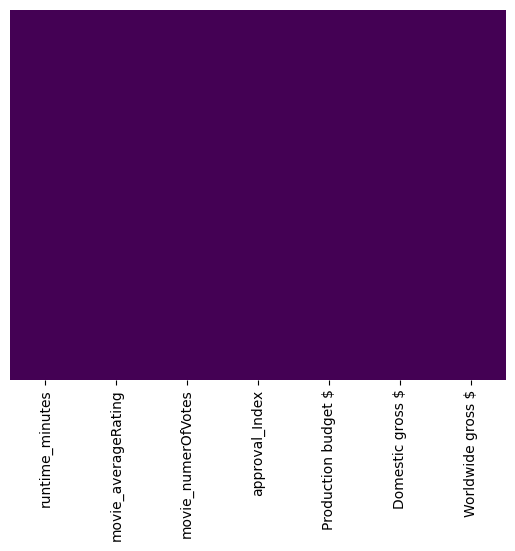

In [127]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


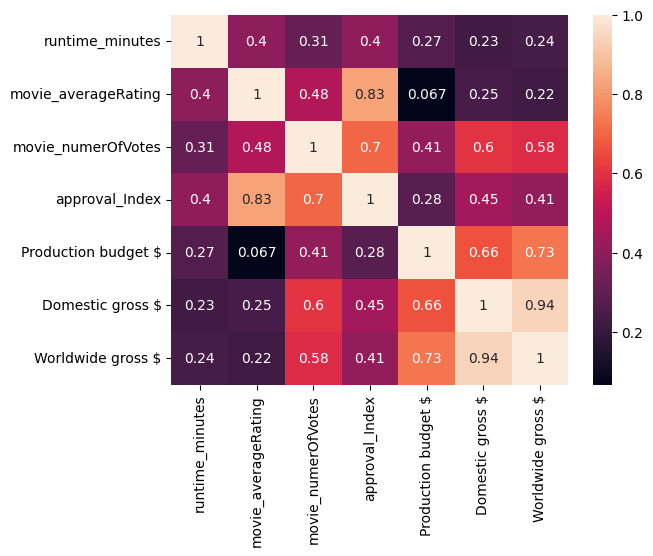

In [128]:
#matriz de corelacion
sns.heatmap(df.corr(), annot=True)
plt.show()

In [129]:
scaler = StandardScaler()
X = df.drop(['Worldwide gross $'], axis=1).values
X = scaler.fit_transform(X)

y = df[['Worldwide gross $']].values
y = scaler.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---------------

#### Redes Neuronales

Objetivo: Predecir el Worldwide gross $ de una película en base a las variables que se tienen.

##### Red Neuronal 1

- Funciones de activación:
    - RELU
    - Linear
- Números de capas y neuronas:
    - 1 capa oculta con 256 neuronas
    - 1 capa oculta con 128 neuronas 
    - 1 capa oculta con 64 neuronas
    - 1 capa de salida con 1 neurona 
- Técnicas de regularización:
    - Dropout

In [135]:
model1 = Sequential()

model1.add(Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(Dropout(0.3))

model1.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(Dropout(0.3))

model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(Dropout(0.3))

model1.add(Dense(1, activation='linear'))

In [136]:
model1.compile(optimizer='adam', loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=19, batch_size=32)

print(f"Training loss (Model 1): {history1.history['loss'][-1]} \n")
loss1 = model1.evaluate(X_test, y_test)
print(f"\nTest loss (Model 1): {loss1}")

Epoch 1/19
110/110 [==============================] - 1s 1ms/step - loss: 1.9739
Epoch 2/19
110/110 [==============================] - 0s 2ms/step - loss: 0.9088
Epoch 3/19
110/110 [==============================] - 0s 2ms/step - loss: 0.6134
Epoch 4/19
110/110 [==============================] - 0s 1ms/step - loss: 0.4541
Epoch 5/19
110/110 [==============================] - 0s 1ms/step - loss: 0.3832
Epoch 6/19
110/110 [==============================] - 0s 1ms/step - loss: 0.3053
Epoch 7/19
110/110 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 8/19
110/110 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 9/19
110/110 [==============================] - 0s 1ms/step - loss: 0.2238
Epoch 10/19
110/110 [==============================] - 0s 1ms/step - loss: 0.1993
Epoch 11/19
110/110 [==============================] - 0s 1ms/step - loss: 0.2050
Epoch 12/19
110/110 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 13/19
110/110 [====

In [139]:
# Agarrar la primera fila de datos, y mandarlo al modelo. 
fila1 = X_test[0].reshape(1, -1)
resultado_teorico = y_test[0]   

# Predicción del modelo
resultado_prediccion = model1.predict(fila1)

# Imprimir el resultado teórico y el resultado de la predicción
print("Resultado teórico: ", resultado_teorico)
print("Resultado de la predicción: ", resultado_prediccion)
print("Error: ", (resultado_teorico - resultado_prediccion)/resultado_teorico*100, "%")

1/1 [==============================] - 0s 23ms/step
Resultado teórico:  [3.10793178]
Resultado de la predicción:  [[2.75091]]
Error:  [[11.48743809]] %


##### Red Neuronal 2

- Funciones de activación:
    - Leaky ReLU
    - Linear
- Números de capas y neuronas:
    - 1 capa oculta con 128 neuronas 
    - 1 capa oculta con 64 neuronas
    - 1 capa de salida con 1 neurona 
- Técnicas de regularización:
    - Batch Normalization

In [ ]:
model2 = Sequential()

model2.add(Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model2.add(LeakyReLU(alpha=0.2))
model2.add(BatchNormalization())

model2.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model2.add(LeakyReLU(alpha=0.2))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='linear'))

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32)

print(f"Training loss (Model 2): {history2.history['loss'][-1]} \n")
loss2 = model2.evaluate(X_test, y_test)
print(f"\nTest loss (Model 2): {loss2}")

Epoch 1/20
110/110 [==============================] - 2s 2ms/step - loss: 1.4532
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 1.0756
Epoch 3/20
110/110 [==============================] - 0s 1ms/step - loss: 0.9577
Epoch 4/20
110/110 [==============================] - 0s 1ms/step - loss: 0.8514
Epoch 5/20
110/110 [==============================] - 0s 1ms/step - loss: 0.7961
Epoch 6/20
110/110 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 7/20
110/110 [==============================] - 0s 1ms/step - loss: 0.6786
Epoch 8/20
110/110 [==============================] - 0s 1ms/step - loss: 0.6178
Epoch 9/20
110/110 [==============================] - 0s 1ms/step - loss: 0.5567
Epoch 10/20
110/110 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 11/20
110/110 [==============================] - 0s 1ms/step - loss: 0.4796
Epoch 12/20
110/110 [==============================] - 0s 2ms/step - loss: 0.4474
Epoch 13/20
110/110 [====

In [140]:
# Agarrar la primera fila de datos, y mandarlo al modelo. 
fila1 = X_test[0].reshape(1, -1)
resultado_teorico = y_test[0]   

# Predicción del modelo
resultado_prediccion = model2.predict(fila1)

# Imprimir el resultado teórico y el resultado de la predicción
print("Resultado teórico: ", resultado_teorico)
print("Resultado de la predicción: ", resultado_prediccion)
print("Error: ", (resultado_teorico - resultado_prediccion)/resultado_teorico*100, "%")

1/1 [==============================] - 0s 162ms/step
Resultado teórico:  [3.10793178]
Resultado de la predicción:  [[2.2044015]]
Error:  [[29.07175424]] %


##### Red Neuronal 3

- Funciones de activación:
    - Linear
    - Relu
    - Tanh
- Números de capas y neuronas:
    - 1 capa oculta con 512 neuronas
    - 1 capa oculta con 256 neuronas
    - 1 capa oculta con 128 neuronas 
    - 1 capa oculta con 64 neuronas
    - 1 capa de salida con 1 neurona 
- Técnicas de regularización:
    - Gaussian Dropout

In [ ]:
model3 = Sequential()

model3.add(Dense(512, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model3.add(GaussianDropout(0.2))

model3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(GaussianDropout(0.2))

model3.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(GaussianDropout(0.2))

model3.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model3.add(GaussianDropout(0.2))

model3.add(Dense(1, activation='linear'))

In [ ]:
model3.compile(optimizer='adam', loss='mean_squared_error')
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=32)

print(f"Training loss (Model 3): {history3.history['loss'][-1]} \n")
loss3 = model3.evaluate(X_test, y_test)
print(f"\nTest loss (Model 3): {loss3}")

Epoch 1/20
110/110 [==============================] - 2s 4ms/step - loss: 3.5940
Epoch 2/20
110/110 [==============================] - 0s 3ms/step - loss: 1.1515
Epoch 3/20
110/110 [==============================] - 0s 4ms/step - loss: 0.5573
Epoch 4/20
110/110 [==============================] - 0s 4ms/step - loss: 0.3708
Epoch 5/20
110/110 [==============================] - 0s 3ms/step - loss: 0.2902
Epoch 6/20
110/110 [==============================] - 0s 3ms/step - loss: 0.2416
Epoch 7/20
110/110 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 8/20
110/110 [==============================] - 0s 3ms/step - loss: 0.2180
Epoch 9/20
110/110 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 10/20
110/110 [==============================] - 0s 3ms/step - loss: 0.1886
Epoch 11/20
110/110 [==============================] - 0s 3ms/step - loss: 0.1834
Epoch 12/20
110/110 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 13/20
110/110 [====

In [141]:
# Agarrar la primera fila de datos, y mandarlo al modelo. 
fila1 = X_test[0].reshape(1, -1)
resultado_teorico = y_test[0]   

# Predicción del modelo
resultado_prediccion = model3.predict(fila1)

# Imprimir el resultado teórico y el resultado de la predicción
print("Resultado teórico: ", resultado_teorico)
print("Resultado de la predicción: ", resultado_prediccion)
print("Error: ", (resultado_teorico - resultado_prediccion)/resultado_teorico*100, "%")

1/1 [==============================] - 0s 112ms/step
Resultado teórico:  [3.10793178]
Resultado de la predicción:  [[2.5375915]]
Error:  [[18.35112112]] %
